In [1]:
import joblib
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
X_train = joblib.load("X_train.pkl")
X_test  = joblib.load("X_test.pkl")
y_train = joblib.load("y_train.pkl")
y_test  = joblib.load("y_test.pkl")

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (356, 46)
Testing samples: (89, 46)


In [4]:
model = IsolationForest(
    n_estimators=150,
    contamination=0.05,
    random_state=42
)

model.fit(X_train)


IsolationForest(contamination=0.05, n_estimators=150, random_state=42)

In [7]:
y_pred = model.predict(X_test)

# Convert IsolationForest predictions (-1: anomaly, 1: normal) to string labels
y_pred_mapped = pd.Series(y_pred).map({-1: 'Anomaly', 1: 'Normal'})


In [8]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_mapped))

Classification Report:

              precision    recall  f1-score   support

     Anomaly       0.33      0.67      0.44         3
      Normal       0.99      0.95      0.97        86

    accuracy                           0.94        89
   macro avg       0.66      0.81      0.71        89
weighted avg       0.97      0.94      0.95        89



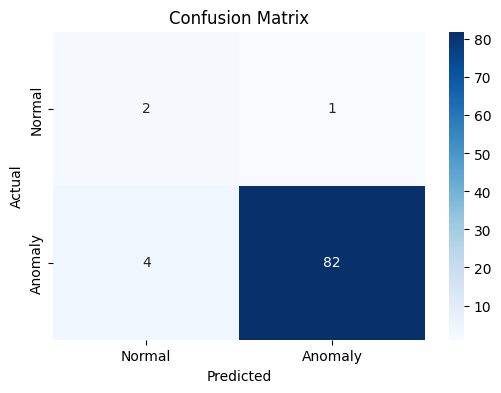

In [10]:
cm = confusion_matrix(y_test, y_pred_mapped)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_ if hasattr(model, 'classes_') else ["Normal", "Anomaly"],
            yticklabels=model.classes_ if hasattr(model, 'classes_') else ["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
import os
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/isolation_forest_model.pkl")
print("✅ Model saved successfully")

✅ Model saved successfully
